# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

2. De kans dat als je iemand willekeurig pakt 

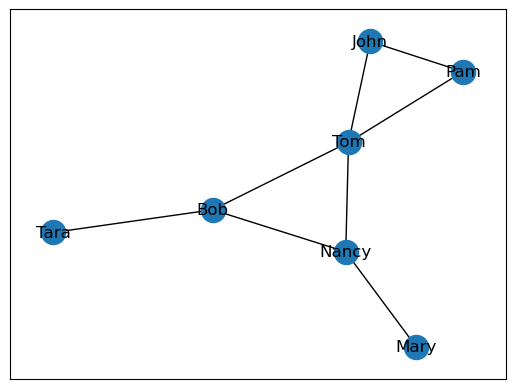

In [2]:
Fig35 = nx.Graph()

Fig35.add_edges_from([("Mary", "Nancy"), ("Nancy", "Tom"), ("Nancy","Bob"), ("Bob", "Tara"), ("Bob", "Tom"), ("John", "Tom"), ("Tom", "Pam"), ("John", "Pam")])

nx.draw_networkx(Fig35, with_labels = True)

In [3]:
def kans_op_knoop(G,knoop):
    return (sum (1/ G.degree(i) / len(G) for i in G.neighbors(knoop)))
 

H= nx.karate_club_graph() 
# test
sum(kans_op_knoop(H,x) for x in H)
# kans_op_knoop(H,1)

1.0

In [4]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

|Vraag|Antwoord|
|---|----|
|3.11| 1: 2,3,5 2: 2,5 3: 2|
|3.12| De graph would have one or two larger hubs| 
|3.13|1: no, most shoe sizes are pretty similar, and the variety is not that big, 2: The richest 10% hold 70% of all money in the USA, so I'd expect a tail. 3: Most accounts on twitter don't have many followers but a few (ten)thousand users do have (hundreds of) millions of followers, so a tail is present. 4: The longeset distance on wikipedia is small. There won't be a tail.|
|3.14| Most likely. That would still be incredibly rare.|
|3.15|1: 100,000,000 2: 5,500,000. 3: 10000
|3.16| |
|3.17| |
|3.18| | 
|3.19| |
|3.20| Yes, but only if it's a complete network | 
|3.21| Yes, networks with heavy-tailed distributions have a lot of hubs, which might function as (local) bridges. Gridlike networks are less vunerable. |
|3.22| d | 
|3.23|Low clustering coefficient|


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# https://xinqianzhai.medium.com/us-airport-network-exploration-and-visualization-using-networkx-and-basemap-be898a216ec1
# downlaod airport and routes data from open data source
#importen vanuit Github of handmatig downloaden werkte niet. Ik heb dit geprobeerd, maar ook zo liep ik vast. Het is een leuke challenge om los te doen, maar nu niet. 

def download_data():
    # get airport data
    airport_cols = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
                   'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
    airport_df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat',
                             names=airport_cols)
    # get routes data
    route_cols = ['Airline', 'Airline ID', 'Source airport', 'Source airport ID',
                  'Dest airport', 'Dest airport ID', 'Codeshare', 'Stops', 'Equipment']
    route_df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',
                             names=route_cols)
    
    # clean route data
    # convert datatype, set nan if errors (non-number) raise 
    route_df['Source airport ID'] = pd.to_numeric(route_df['Source airport ID'].astype('str'), errors = 'coerce')
    route_df['Dest airport ID'] = pd.to_numeric(route_df['Dest airport ID'].astype('str'), errors = 'coerce')
    # drop nan values in the source airport ID and dest airport ID
    route_df.dropna(subset=['Source airport ID', 'Dest airport ID'], inplace=True)
    
    return airport_df, route_df

In [7]:
route_df, airport_df = download_data()
route_df.head()

,ID,Name,City,Country,IATA,ICAO,Lat,Long,Alt,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


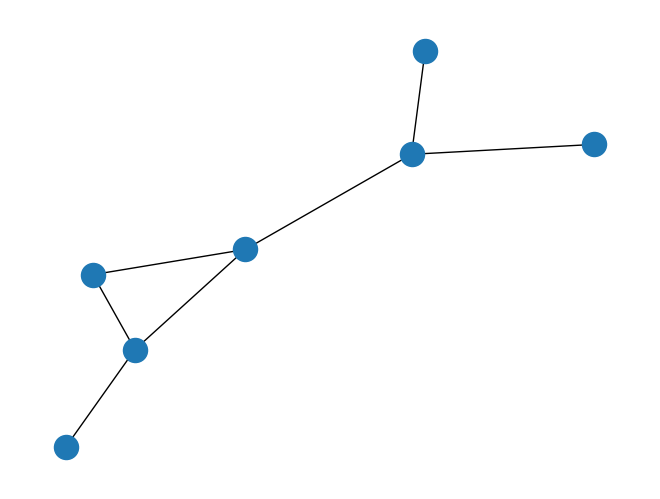

In [8]:
H = nx.Graph()
# N = [1,2,3,4,5,6,7]
# H.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
# Edges = nx.Graph([(1,2), (1,3), (2,3), (2,5), (5,6), (5,7), (3,4)])
H.add_edges_from([(1,2), (1,3), (2,3), (2,5), (5,6), (5,7), (3,4)])

nx.draw(H)


In [9]:
nx.closeness_centrality(H)

{1: 0.5,
 2: 0.6666666666666666,
 3: 0.5454545454545454,
 5: 0.6,
 6: 0.4,
 7: 0.4,
 4: 0.375}